Step 1: Data loading


In [ ]:
import pandas as pd

# Load the file name
df = pd.read_excel('SAF Dataset.xlsx')

# view the first few rows
print(df.head())


       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location   \
0  13.045822  37.260000  14.620000  31.680000        US   
1  17.216438  31.300000  24.300000  14.100000        US   
2  17.684464  35.000000  27.500000  10.000000        US   
3   8.626970  35.000000  25.000000  26.500000        US   
4  16.030195  22.775726  55.419525   2.955145        US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0

In [ ]:
# view the column's data types
print(df.dtypes)

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)      int64
MSP                       float64
dtype: object


Step 2: check for missing data values

In [ ]:
# print how many cells have missing data and which columns they are in

# Count missing values in each column
missing_values = df.isnull().sum()

# Total missing values in the DataFrame
total_missing = missing_values.sum()

print("Missing values in each column:")
print(missing_values)

print("\nTotal missing values:", total_missing)

Missing values in each column:
C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64

Total missing values: 0


Because there is no missing data, I will not handle the data as if they are missing.

Note: if data is missing, we could delete the row, fill the data with the mean, meadian, or mode.


Step 3: Handling Outliers

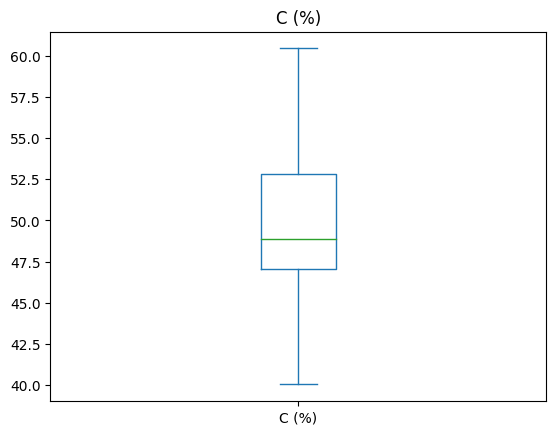

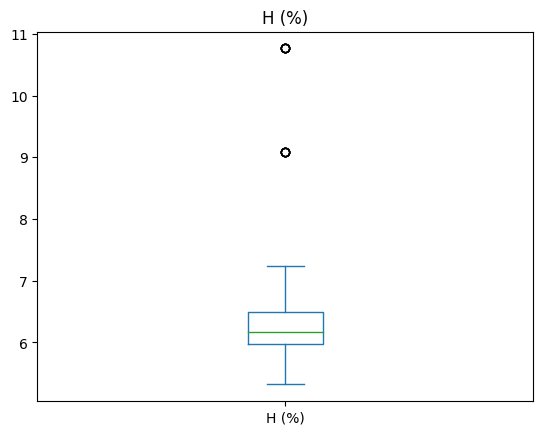

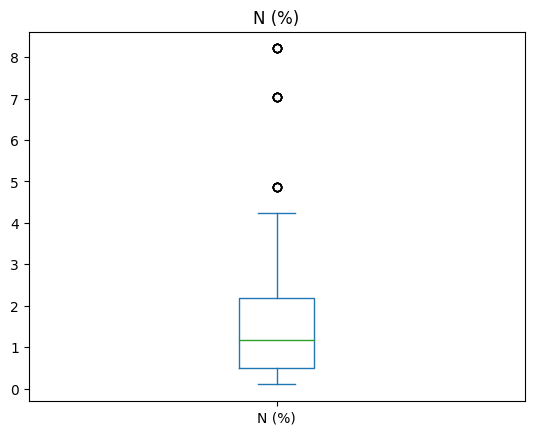

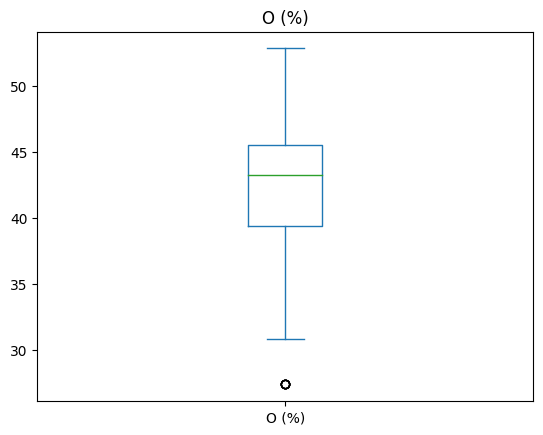

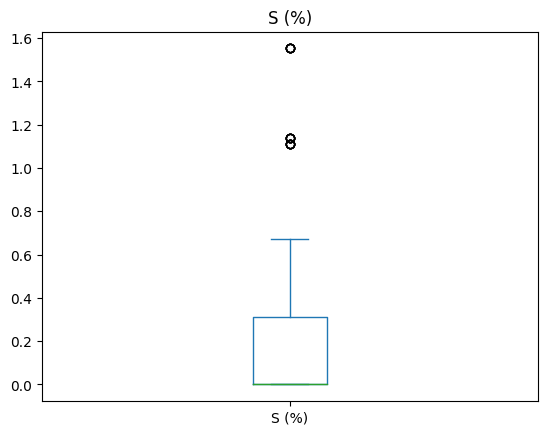

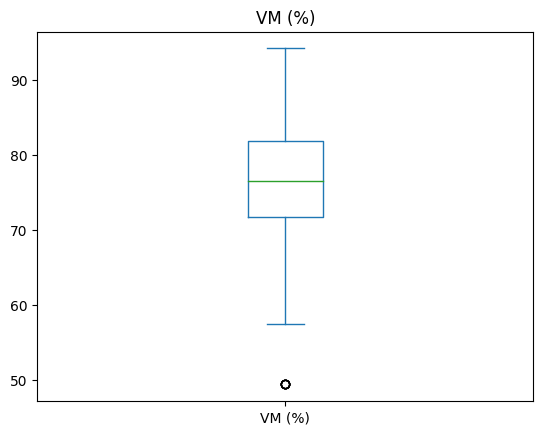

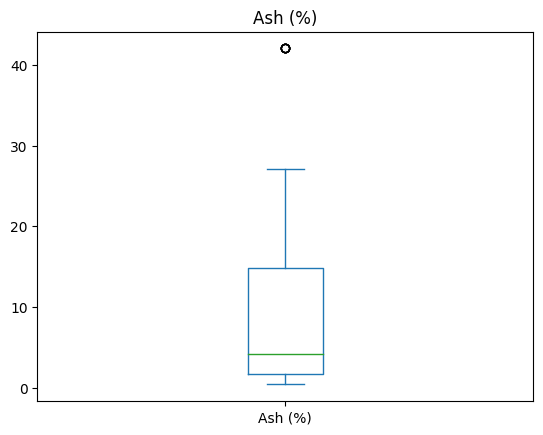

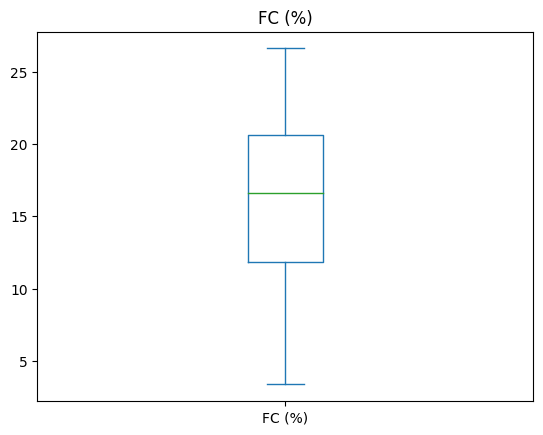

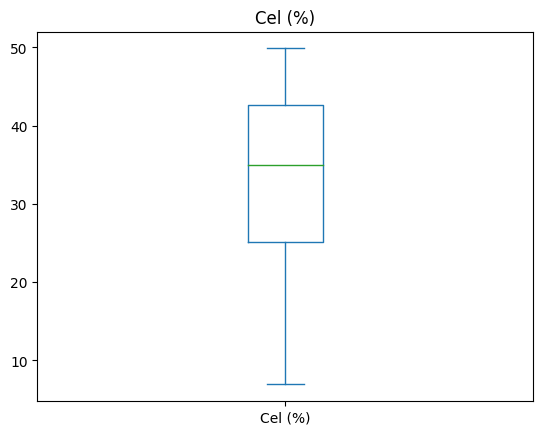

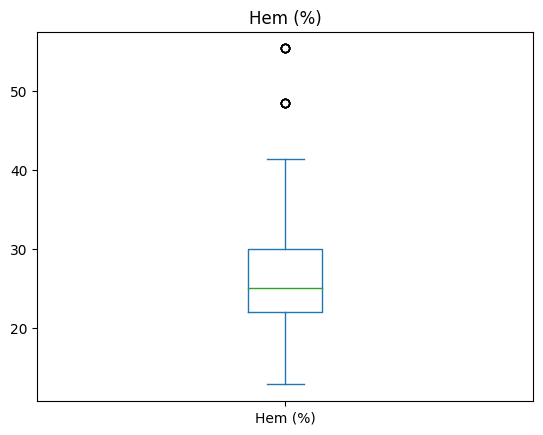

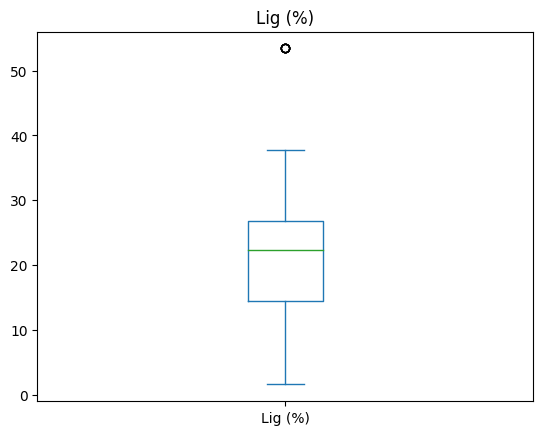

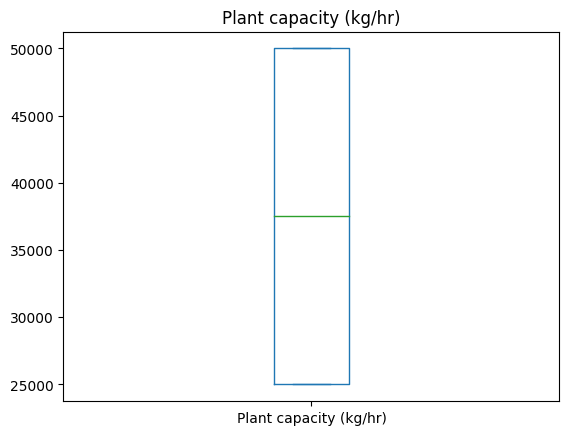

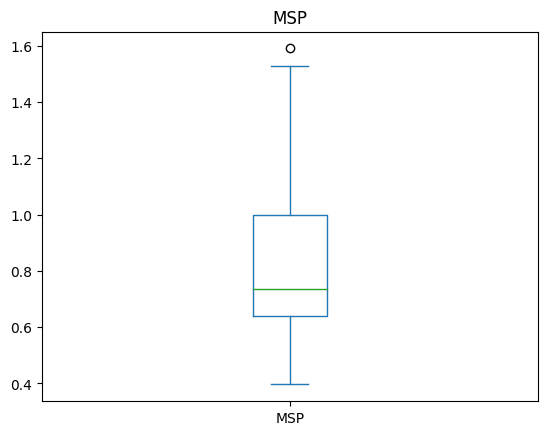

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Visulaize outliers in the dataset

# Filter for numeric columns (integer or float)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create box plots for each numeric column, handling potential NaN values
for col in numeric_columns:
    # Check for NaN values and handle them appropriately
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())  # Replace NaN with column mean (adjust as needed)

    # Create box plot
    df[col].plot(kind='box', title=col)
    plt.show()

In [ ]:
# Create a new data_frame df_clean and delete rows that have outliers

# Filter for numeric columns (integer or float)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a new DataFrame to store rows without outliers
df_clean = df.copy()

# Iterate through numeric columns and remove outliers
for col in numeric_columns:
    # Calculate quartiles and IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove rows with outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Save the cleaned DataFrame to a new XLSX file
df_clean.to_excel('cleaned_data.xlsx', index=False)

Step 4: Summary statistics

In [ ]:
import pandas as pd

# Filter for numeric columns (integer or float)
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64'])

# Calculate descriptive statistics
descriptive_stats = numeric_columns.describe()

# Print the results
print(descriptive_stats)

# Calculate IQR
iqr = descriptive_stats.loc['75%'] - descriptive_stats.loc['25%']
print("Interquartile Range (IQR):\n", iqr)

            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean    49.155055    6.133785    1.133585   43.477464    0.100113   76.987560   
std      3.331214    0.369787    0.934751    3.389774    0.177063    7.507857   
min     40.020000    5.320000    0.100000   37.293729    0.000000   60.840000   
25%     47.649030    5.980000    0.450000   40.600000    0.000000   72.950000   
50%     48.867116    6.120000    0.871969   43.440000    0.000000   77.318919   
75%     51.710000    6.256410    1.580158   45.557022    0.121371   81.797235   
max     55.235524    7.236989    4.246211   52.860000    0.671063   94.161220   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)  \
count  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     6.705238   16.307202   36.206543   25.627964   21.561196   
std      7.057265    6.288224    8.261125    7.760810    8.7141

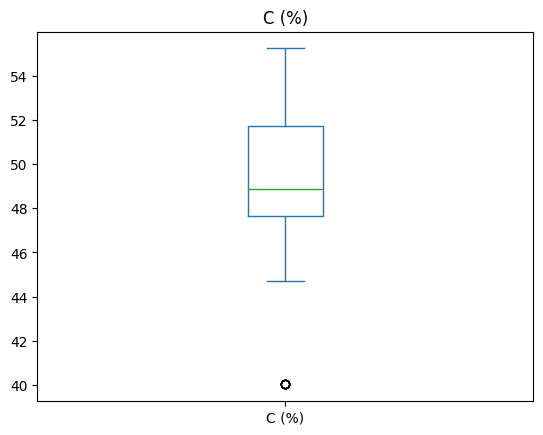

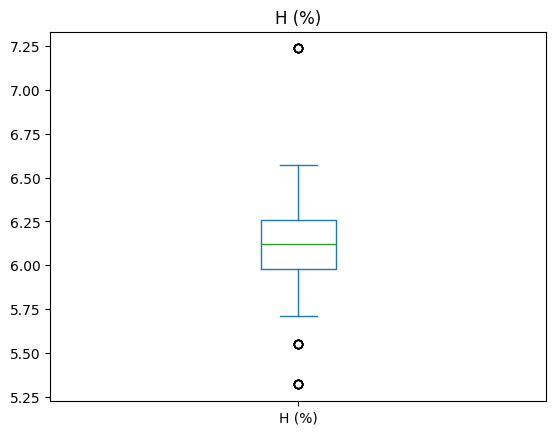

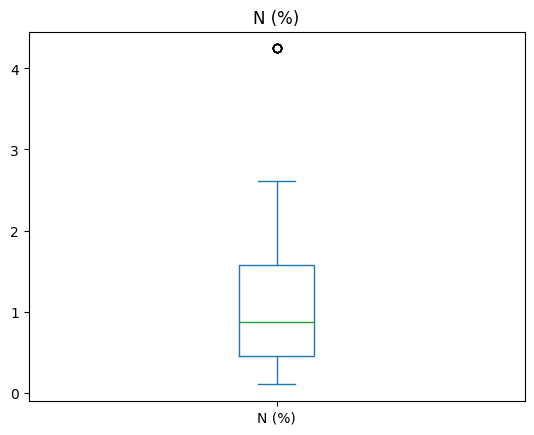

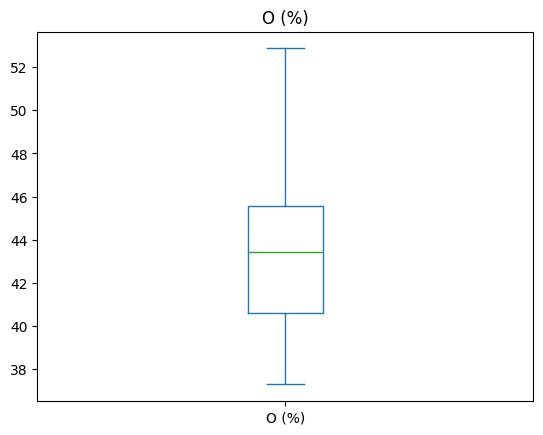

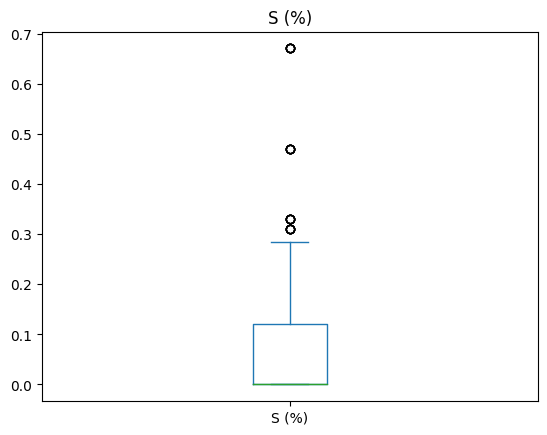

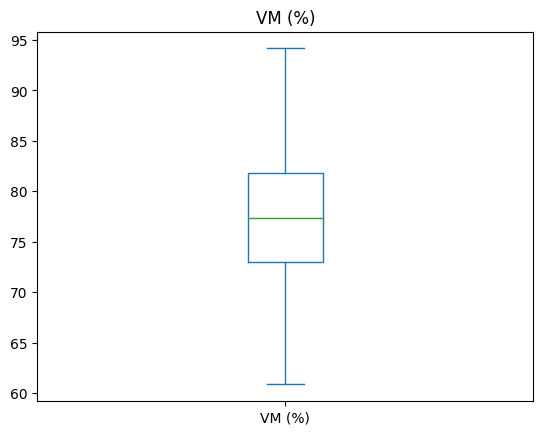

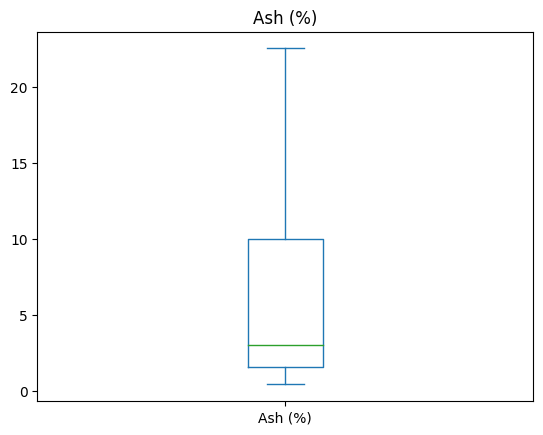

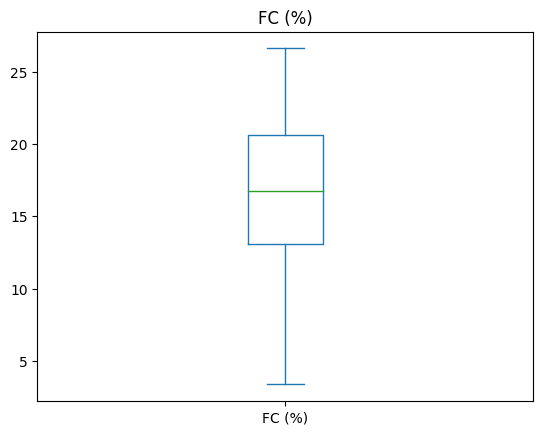

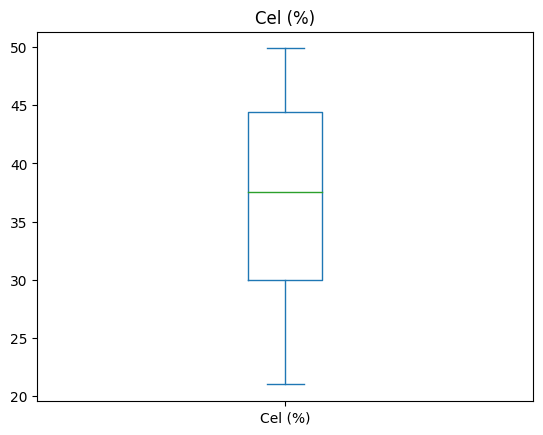

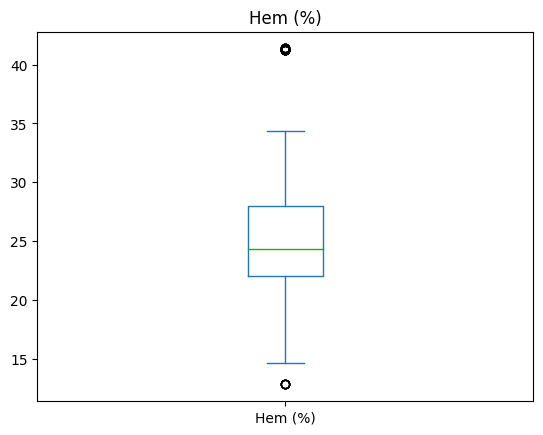

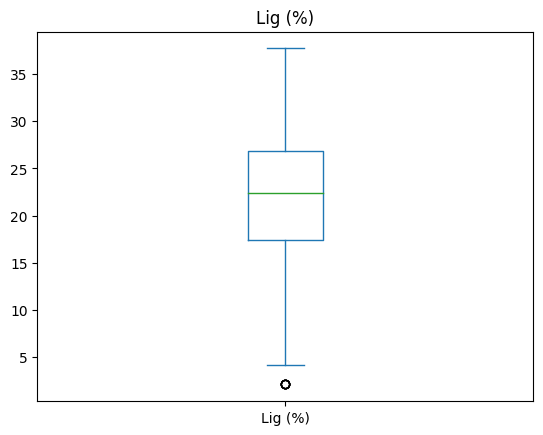

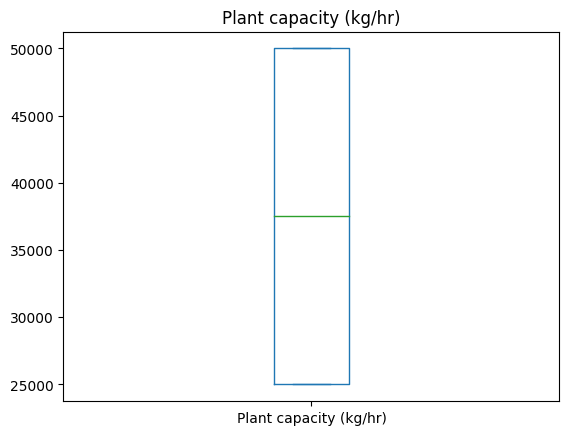

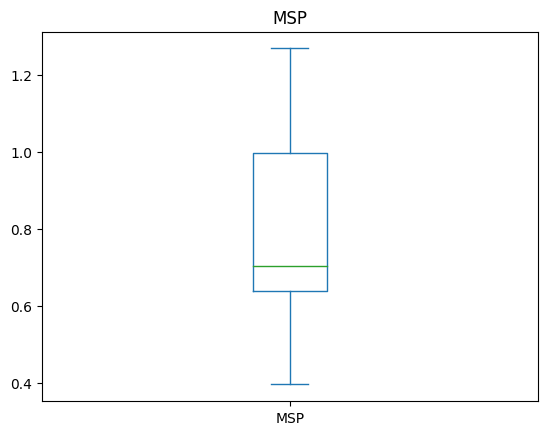

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Visulaize outliers in the dataset

# Filter for numeric columns (integer or float)
numeric_columns = df_clean.select_dtypes(include=['int64', 'float64'])

# Create box plots for each numeric column, handling potential NaN values
for col in numeric_columns:
    # Check for NaN values and handle them appropriately
    if df_clean[col].isnull().any():
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())  # Replace NaN with column mean (adjust as needed)

    # Create box plot
    df_clean[col].plot(kind='box', title=col)
    plt.show()

To check if data in normally distributed and has no skew, I check to see if IQR is smaller than the bottom and top of the 25% and if the IQR is about in the center of the data. If the IQR skews towards a higher portion of the data, then it is skewed right. If skewed towards the lower portion, then it is skewed left. If the IQR is not visible, then it isn't normal. Skewed right: MSP. Skewed left, C, N, Ash. Not skewed: H, O, VM, FC, Cel, Hem, Lig,
Not normal: S, Plant capacity


Step 5: One hot encoding for Caategorical Variables. Note, the new data file is df_encoded.


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Get the data types of all columns
data_types = df.dtypes

# Identify categorical columns (object type)
categorical_columns = data_types[data_types == 'object'].index.tolist()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
print(df_encoded)

         C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)  \
0    53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   
1    52.846674   6.186584  0.436866  40.219842  0.310034  70.783562   
2    40.020000   6.010000  0.880000  52.860000  0.230000  72.294705   
3    45.739910  10.762332  7.036909  34.908589  1.552259  49.357766   
4    44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   
..         ...        ...       ...        ...       ...        ...   
181  50.840673   5.904724  0.300240  42.934347  0.020016  85.300000   
182  52.036199   6.979295  3.551351  36.295077  1.138078  57.460000   
183  53.200000   6.100000  0.100000  40.600000  0.000000  80.600000   
184  55.235524   5.890589  1.580158  37.293729  0.000000  84.041451   
185  60.460000   9.080000  3.100000  27.360000  0.000000  85.683987   

       Ash (%)     FC (%)    Cel (%)    Hem (%)    Lig (%)  \
0     4.884097  13.045822  37.260000  14.620000  31.680000   
1    12.000000  17.2164

In [ ]:
# check for columns with constant values

import pandas as pd

# Assuming your DataFrame is named 'df'

constant_columns = df.columns[(df.nunique() == 1)]
print("Constant columns:", constant_columns)

Constant columns: Index([], dtype='object')


In [ ]:
# checks for columns with the same name

duplicate_columns = df.columns.duplicated()
duplicate_columns_index = df.columns[df.columns.duplicated()].tolist()
print("Duplicate columns:", duplicate_columns_index)

Duplicate columns: []


In [ ]:
# check for identical values across all rows

identical_columns = []
for col1, col2 in zip(df.columns[:-1], df.columns[1:]):
    if (df[col1] == df[col2]).all():
        identical_columns.append((col1, col2))
print("Identical columns:", identical_columns)

Identical columns: []


In [ ]:
# print identical columns

redundant_columns = set(constant_columns).union(duplicate_columns_index).union([col1 for col1, _ in identical_columns])
print("Redundant columns:", redundant_columns)

Redundant columns: set()


In [ ]:
# delete idental columns

df_cleaned = df_encoded.drop(columns=redundant_columns)

NO columns were removed because there were no repeats

Step 7: Correlation and Heatmaps

                               C (%)         H (%)         N (%)  \
C (%)                   1.000000e+00  1.264528e-01 -3.271896e-02   
H (%)                   1.264528e-01  1.000000e+00  5.730386e-01   
N (%)                  -3.271896e-02  5.730386e-01  1.000000e+00   
O (%)                  -8.070651e-01 -5.717483e-01 -5.327822e-01   
S (%)                   3.468611e-02  5.934591e-01  7.221800e-01   
VM (%)                  2.370645e-01 -3.312851e-01 -3.815963e-01   
Ash (%)                -6.838875e-02  5.496854e-01  6.390202e-01   
FC (%)                 -2.348595e-01 -3.746149e-01 -4.406216e-01   
Cel (%)                -1.209621e-03 -8.987402e-02 -3.852100e-01   
Hem (%)                -1.974085e-01 -1.932930e-02  3.214638e-01   
Lig (%)                 1.708138e-01 -8.634971e-02 -3.705005e-01   
Plant capacity (kg/hr)  4.923250e-16 -1.866871e-15 -1.867358e-16   
MSP                    -1.113929e-01  9.370541e-02  2.215976e-01   
Location _China         1.352526e-15 -5.998763e-

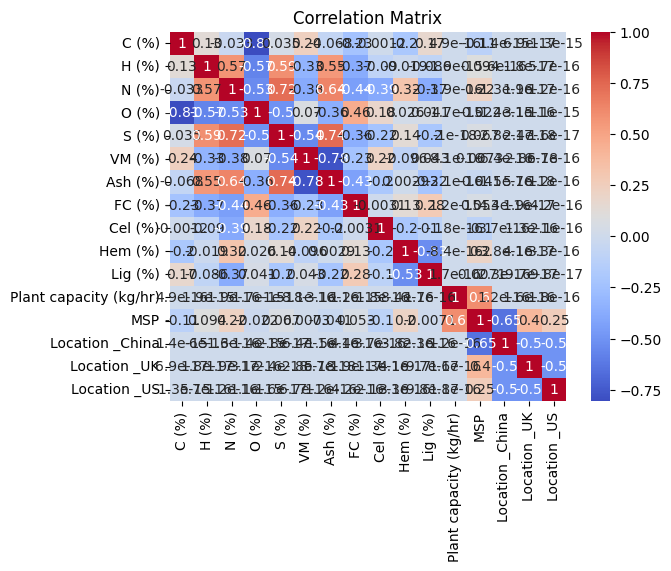

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Print the correlation matrix
print(correlation_matrix)

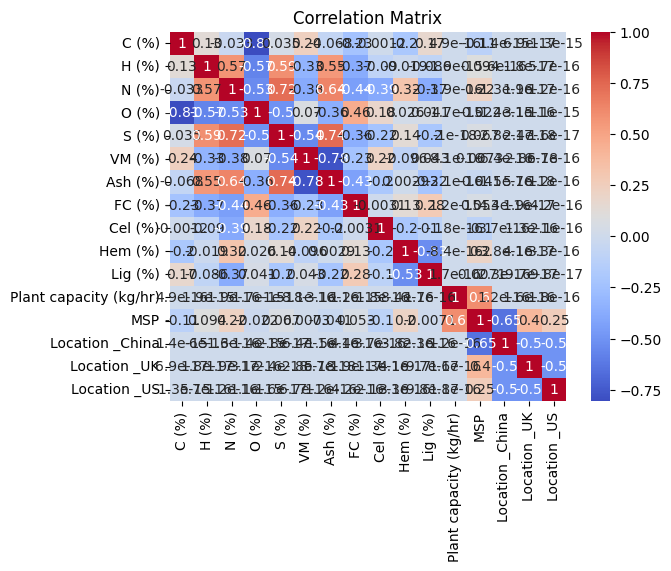

In [ ]:
# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is significant correlation between oxygen and the lack of other gasses. Lif and Hem also have an inverse relationship.

Step 8: Visualizing Data Relationships


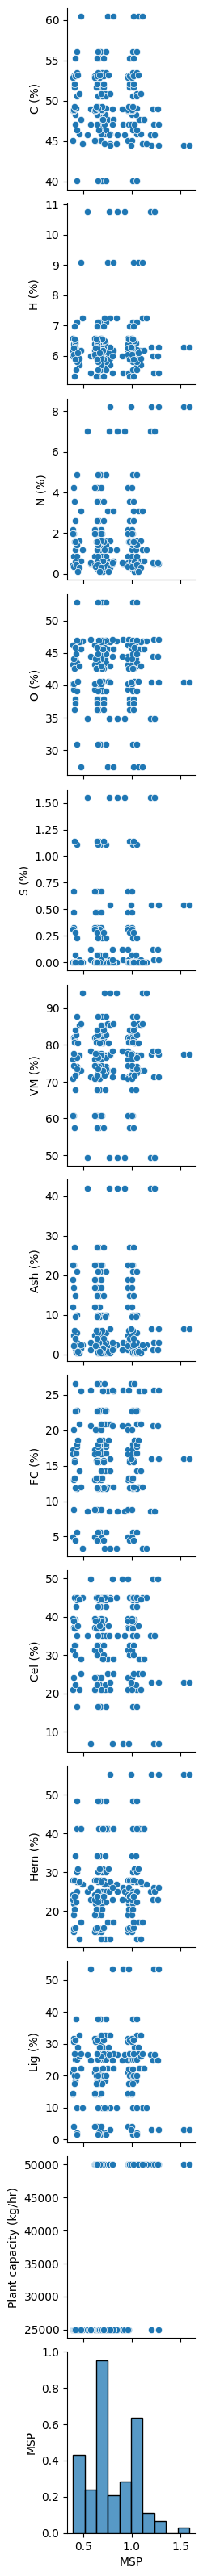

In [ ]:
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named 'df'

# Filter for numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Create a pair plot with 'MSP' on the x-axis for all numeric columns
sns.pairplot(df, x_vars=['MSP'], y_vars=numeric_columns)

The onlt two variables that influence MSP are the plant capacity and N. They only have slight influences, and there aren't any unexpected patterns.

Step 9: Dealing with multicollinearity

In [ ]:
# find columns with high correlation values and drop them
import pandas as pd

correlation_matrix = df_encoded.corr()

# Find variables with high correlations
high_correlations = correlation_matrix[(correlation_matrix >= 0.9) | (correlation_matrix <= -0.9)]
high_correlations = high_correlations[high_correlations != 1]

print(high_correlations)

# Reset the index to get a regular index
high_correlations = high_correlations.reset_index()

# Get the indices of the columns to drop
columns_to_drop = []
for col1, col2 in zip(high_correlations['level_0'], high_correlations['level_1']):
    if col1 not in columns_to_drop and col2 not in columns_to_drop:
        columns_to_drop.append(col1)

# Drop the columns
df_encoded_cleaned = df_encoded.drop(columns=columns_to_drop)

print("Cleaned DataFrame:")
print(df_cleaned)

                        C (%)  H (%)  N (%)  O (%)  S (%)  VM (%)  Ash (%)  \
C (%)                     NaN    NaN    NaN    NaN    NaN     NaN      NaN   
H (%)                     NaN    NaN    NaN    NaN    NaN     NaN      NaN   
N (%)                     NaN    NaN    NaN    NaN    NaN     NaN      NaN   
O (%)                     NaN    NaN    NaN    NaN    NaN     NaN      NaN   
S (%)                     NaN    NaN    NaN    NaN    NaN     NaN      NaN   
VM (%)                    NaN    NaN    NaN    NaN    NaN     NaN      NaN   
Ash (%)                   NaN    NaN    NaN    NaN    NaN     NaN      NaN   
FC (%)                    NaN    NaN    NaN    NaN    NaN     NaN      NaN   
Cel (%)                   NaN    NaN    NaN    NaN    NaN     NaN      NaN   
Hem (%)                   NaN    NaN    NaN    NaN    NaN     NaN      NaN   
Lig (%)                   NaN    NaN    NaN    NaN    NaN     NaN      NaN   
Plant capacity (kg/hr)    NaN    NaN    NaN    NaN    NaN     Na

KeyError: 'level_0'

Just looking at the heat map, I know that there are no two features taht are highly correlation, so I'm not dropping anything

Step 10: Final Thoughts


IMO, the most important variables in determining SAF are plant capacity and the location of the plant. Plant capacity, UK, and US have a positive correlation between SAF which China locations have a negative correlation.

The only data quality issues were that there were outliers

Relationships that standout are the relationships of elements with each other, but speciffically Nitrogen with all other elemetns